In [29]:
import pprint
import numpy as np
from Lab1_support.utils_nb import plot_vectors
import matplotlib.pyplot as plt

In [30]:
pp = pprint.PrettyPrinter(indent=4)

In [31]:
def basic_hash_table(value_l, n_buckets):
    def hash_fn(value, n_buckets):
        return int(value)%n_buckets
    
    hash_table = {i:[] for i in range(n_buckets)}

    for value in value_l:
        hash_val = hash_fn(value,n_buckets)
        hash_table[hash_val].append(value)

    return hash_table

In [32]:
value_l = [100,47,1,9,23,10,17,97,14]
hash_table_example = basic_hash_table(value_l,n_buckets=10)
pp.pprint(hash_table_example)

{   0: [100, 10],
    1: [1],
    2: [],
    3: [23],
    4: [14],
    5: [],
    6: [],
    7: [47, 17, 97],
    8: [],
    9: [9]}


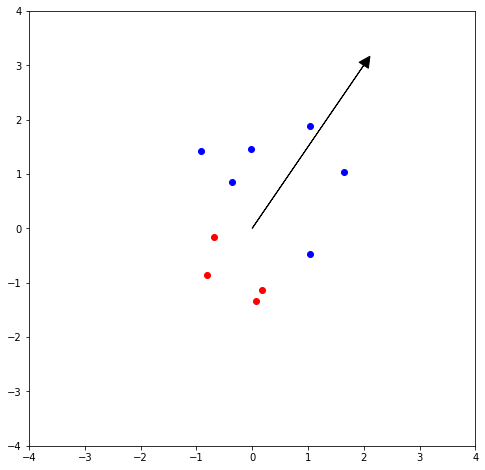

In [33]:
P = np.array([[2,3]])
fig,ax = plt.subplots(figsize=(8,8))
plot_vectors([P],axes=[4,4],ax=ax)

for i in range(10):
    v1 = np.array(np.random.uniform(-2,2,2))
    side_of_plane = np.sign(np.dot(P,v1.T))

    if side_of_plane==1:
        ax.plot([v1[0]],[v1[1]],'bo')
    else:
        ax.plot([v1[0]],[v1[1]],'ro')

plt.show()

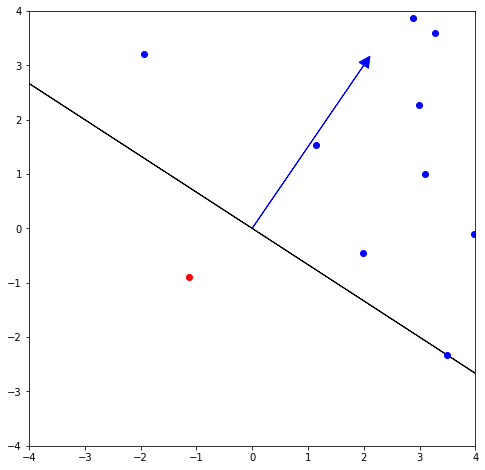

In [34]:
P1 = np.array([[2,3]])
P2 = np.dot([[0,1],[-1,0]],P1.T).T

fig,ax = plt.subplots(figsize=(8,8))
plot_vectors([P1],colors=['b'],axes=[4,4],ax=ax)
plot_vectors([P2*4, P2*-4],colors=['k','k'],axes=[4, 4],ax=ax)

for i in range(10):
    v1 = np.array(np.random.uniform(-5,5,2))
    side_of_plane = np.sign(np.dot(P1,v1.T))

    if side_of_plane==1:
        ax.plot([v1[0]],[v1[1]],'bo')
    else:
        ax.plot([v1[0]],[v1[1]],'ro')

plt.show()

In [35]:
def side_of_plane(P,v):
    dotprod = np.dot(P,v.T)
    sign = np.sign(dotprod)
    sign = sign.item()
    return sign

In [36]:
side_of_plane(np.array([[2,3]]),np.array([4,6]))

1

In [37]:
side_of_plane(np.array([[2,3]]),np.array([4,-1]))

1

In [38]:
side_of_plane(np.array([[2,3]]),np.array([-1,-5]))

-1

In [39]:
side_of_plane(np.array([[2,3]]),np.array([0,0]))

0

In [40]:
P1 = np.array([[1,1]])
P2 = np.array([[1,-1]])
P3 = np.array([[-1,-1]])
P_l = [P1,P2,P3]

v = np.array([[2,2]])

In [41]:
def hash_multi_plane(P_l,v):
    hash_val = 0
    for i,P in enumerate(P_l):
        side = side_of_plane(P,v)
        hash_val += (2**i)*(1 if side >= 0 else 0)
    
    return hash_val

In [42]:
hash_multi_plane(P_l,v)

3

In [61]:
n_dims = 2
n_planes = 4
random_planes = np.random.normal(size=(n_planes,n_dims))
pp.pprint(random_planes)

array([[ 0.16234247,  0.25722913],
       [-1.27545586,  0.06400443],
       [-1.06185662, -0.98936839],
       [-0.45772323, -1.98418161]])


In [62]:
v = np.array([[2,2]])

In [63]:
def side_of_plane_multiplane(P_l,v):
    dotprod = np.dot(P_l,v.T)
    sign = np.sign(dotprod)
    return sign

In [64]:
sides_l = side_of_plane_multiplane(P_l,v)
sides_l

array([[[ 1]],

       [[ 0]],

       [[-1]]])

In [65]:
def hash_multiplane_matrix(P_l,v,n_planes):
    sides = side_of_plane_multiplane(P_l,v)
    hash_val = 0
    for i in range(n_planes):
        sign = sides[i].item()
        hash_val += (2**i)*(1 if sign>=0 else 0)

    return hash_val

In [66]:
hash_multiplane_matrix(random_planes,v,n_planes)

1

In [67]:
word_embedding = {'I':np.array([1,0,1]),
                  'love':np.array([-1,0,-1]),
                  'learning':np.array([-1,1,-1])}

words_in_doc = ['I','love','learning','nothing']
doc_embedding = np.array([0,0,0])
for word in words_in_doc:
    doc_embedding += word_embedding.get(word,0)

doc_embedding

array([-1,  1, -1])